In [1]:
import pandas as pd

data = pd.read_csv('./data/train.csv')
data[['질문_1', '질문_1', '답변_1', '답변_2', '답변_3', '답변_4', '답변_5']].apply(lambda col: col.apply(lambda sentence: len(sentence)).mean())

질문_1     19.187888
질문_1     19.187888
답변_1     95.731366
답변_2    194.504658
답변_3    194.607143
답변_4    196.967391
답변_5    195.385093
dtype: float64

최종 답변의 max_length를 200으로 설정한 이유

마감재       272
인테리어      123
시공        111
마감하자       60
건축구조       31
기타         27
타 마감하자     20
Name: category, dtype: int64


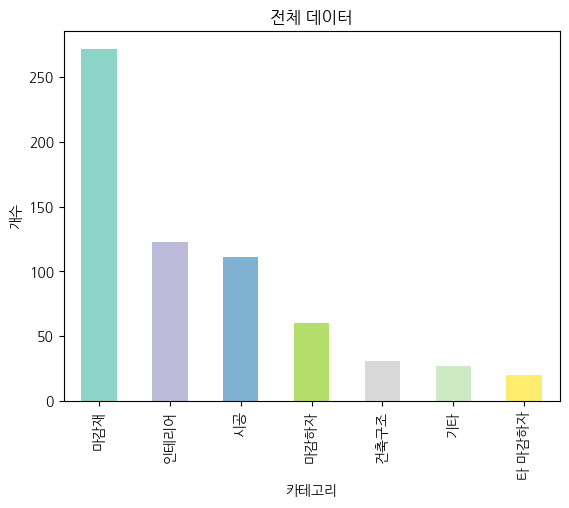

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothic')

category_counts = data['category'].value_counts()
cmap = cm.get_cmap('Set3', len(category_counts))
category_counts.plot(kind='bar', color=cmap(range(len(category_counts))), xlabel='카테고리', ylabel='개수', title='전체 데이터')
print(category_counts)

In [26]:
from sklearn.model_selection import train_test_split

# 각 카테고리별로 train-test split 수행
train_data = pd.DataFrame()
test_data = pd.DataFrame()

categories = data['category'].unique()

for category in categories:
    category_data = data[data['category'] == category]
    train_category, test_category = train_test_split(category_data, test_size=0.2, random_state=42)
    train_data = pd.concat([train_data, train_category], ignore_index=True)
    test_data = pd.concat([test_data, test_category], ignore_index=True)

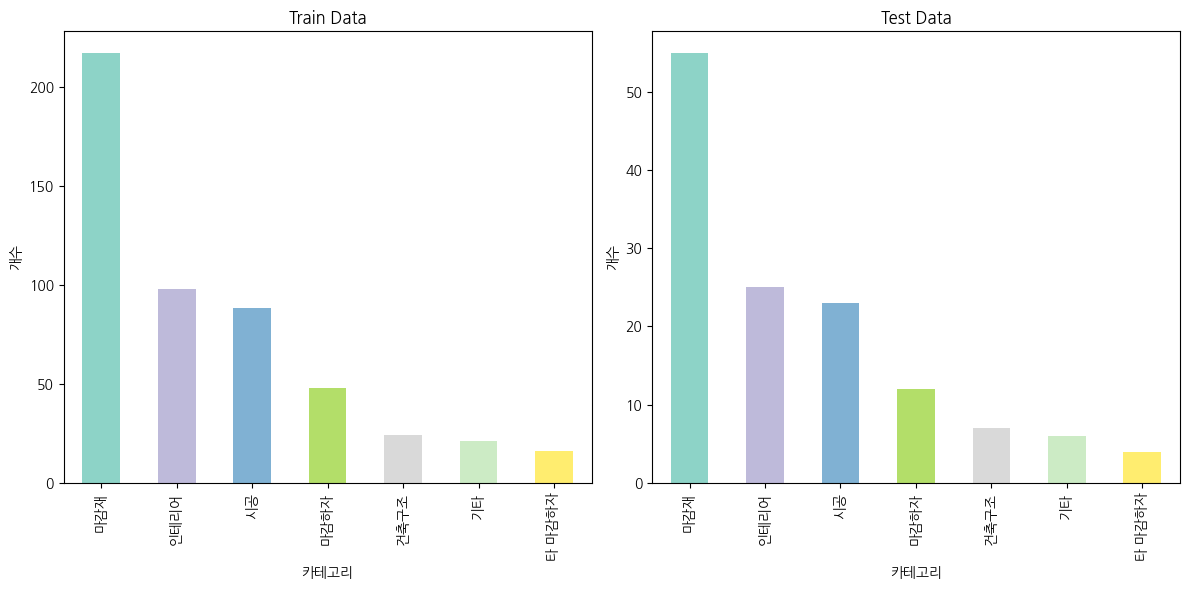

In [27]:
# Train Data 그래프
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

train_data['category'].value_counts().plot(kind='bar', color=cmap(range(len(categories))), ax=axes[0])
axes[0].set_title('Train Data')
axes[0].set_xlabel('카테고리')
axes[0].set_ylabel('개수')

# Test Data 그래프
test_data['category'].value_counts().plot(kind='bar', color=cmap(range(len(categories))), ax=axes[1])
axes[1].set_title('Test Data')
axes[1].set_xlabel('카테고리')
axes[1].set_ylabel('개수')

# 그래프 표시
plt.tight_layout()
plt.show()

원본과 같은 비율로 train, validation 데이터를 나눠줬다.